## Setup

In [1]:
import utils
import numpy as np
import pandas as pd
from deepchem import deepchem as dc
from sklearn.ensemble import RandomForestRegressor
from deepchem.models import SklearnModel

Skipped loading modules with pytorch-geometric dependency, missing a dependency. No module named 'torch_sparse'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. cannot import name 'DMPNN' from 'deepchem.models.torch_models' (c:\Users\xsj110\AppData\Local\Programs\Python\Python38\lib\site-packages\deepchem\models\torch_models\__init__.py)
Skipped loading some Jax models, missing a dependency. No module named 'jaxlib'


In [2]:
data = utils.load_data('10K.csv', 1000, True)

In [3]:
df_sample = data.sample(n=10)

In [4]:
df_sample

,i_i_glide_lignum,r_i_docking_score,SMILES,molecules,MolWt
Unnamed: 0,,,,,
4825,14989,-8.01900,O=C(Cc1cccs1)NCc1cccc(-n2ccc(C(=O)[O-])n2)c1,<rdkit.Chem.rdchem.Mol object at 0x000001D866B...,340.384
3314,15122,-8.56034,COc1cc(CC(=O)Nc2cccc3c2CCNC3=O)ccc1C,<rdkit.Chem.rdchem.Mol object at 0x000001D866B...,324.380
8535,16473,-6.08356,O=C(N[C@@H]1CCCS(=O)(=O)C1)N1CCOCC1,<rdkit.Chem.rdchem.Mol object at 0x000001D866C...,262.331
5957,19158,-7.56715,O=C([O-])Cn1cc(NC(=O)[C@H]2CC(=O)N(C3CCCC3)C2)cn1,<rdkit.Chem.rdchem.Mol object at 0x000001D866C...,319.341
3364,9957,-8.54169,COc1ccc2c(c1)c(C(=O)NC[C@H](O)C1CC1)c(C)n2C1CC1,<rdkit.Chem.rdchem.Mol object at 0x000001D866B...,328.412
7488,501,-6.82972,Cc1cc(C)n2ncc(C(=O)Nc3ccccc3)c2n1,<rdkit.Chem.rdchem.Mol object at 0x000001D866C...,266.304
7470,8122,-6.83850,C[C@@H](NC(=O)c1cn(CC(=O)[O-])nn1)C1CCC(F)(F)CC1,<rdkit.Chem.rdchem.Mol object at 0x000001D866C...,315.300
5491,11635,-7.76300,Cc1ccc(C(=O)NCC2(O)CCCCCC2)o1,<rdkit.Chem.rdchem.Mol object at 0x000001D866B...,251.326
6006,10257,-7.54929,COc1cc(C(=O)N2CC[C@@H](C(=O)[O-])C2)ccc1F,<rdkit.Chem.rdchem.Mol object at 0x000001D866C...,266.248


## Initial model

In [5]:
rf_model = RandomForestRegressor(random_state=57)
model = SklearnModel(model=rf_model)

In [6]:
featurizer = dc.feat.CircularFingerprint(size=1024)

feat = featurizer
X = feat.featurize(df_sample['molecules'])
y = df_sample['r_i_docking_score'].to_numpy()
ids = df_sample['SMILES']
dataset = dc.data.NumpyDataset(X=X, y=y, ids=ids)

In [7]:
dataset

<NumpyDataset X.shape: (10, 1024), y.shape: (10,), w.shape: (10,), ids: ['O=C(Cc1cccs1)NCc1cccc(-n2ccc(C(=O)[O-])n2)c1'
 'COc1cc(CC(=O)Nc2cccc3c2CCNC3=O)ccc1C'
 'O=C(N[C@@H]1CCCS(=O)(=O)C1)N1CCOCC1'
 'O=C([O-])Cn1cc(NC(=O)[C@H]2CC(=O)N(C3CCCC3)C2)cn1'
 'COc1ccc2c(c1)c(C(=O)NC[C@H](O)C1CC1)c(C)n2C1CC1'
 'Cc1cc(C)n2ncc(C(=O)Nc3ccccc3)c2n1'
 'C[C@@H](NC(=O)c1cn(CC(=O)[O-])nn1)C1CCC(F)(F)CC1'
 'Cc1ccc(C(=O)NCC2(O)CCCCCC2)o1'
 'COc1cc(C(=O)N2CC[C@@H](C(=O)[O-])C2)ccc1F'
 'NC(=O)c1ccc(N2CCCCC2)c(NC(=O)c2ccnnc2)c1'], task_names: [0]>

In [95]:
model.fit(dataset)

## Eval section

In [53]:
from matplotlib import pyplot as plt

preds_tiny = model.predict(dataset)

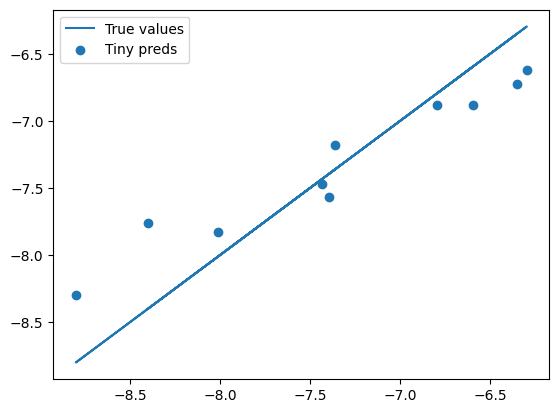

In [54]:
plt.plot(dataset.y, dataset.y, label="True values")
plt.scatter(dataset.y, preds_tiny, label="Tiny preds")
plt.legend()

In [55]:
utils.eval(model, dataset)

RMSE   | 0.331
R2     | 0.836
MAE    | 0.279
mean   | -7.322
std    | 0.525


In [56]:
# Remove samples from the larger df
data = data.drop(df_sample.index)

In [57]:
featurizer = dc.feat.CircularFingerprint(size=1024)

feat = featurizer
X = feat.featurize(data['molecules'])
y = data['r_i_docking_score'].to_numpy()
ids = data['SMILES']

dataset = dc.data.NumpyDataset(X=X, y=y, ids=ids)

In [58]:
preds_large = model.predict(dataset)

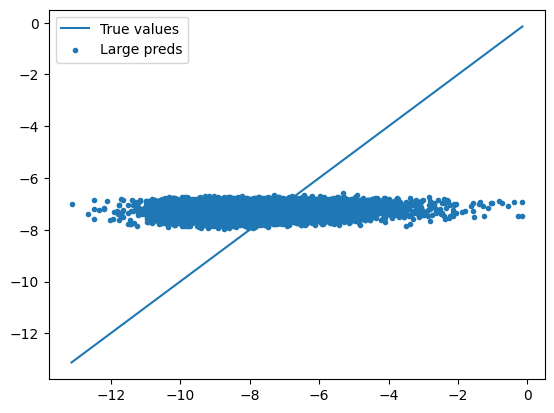

In [59]:
plt.plot(dataset.y, dataset.y, label="True values")
plt.scatter(dataset.y, preds_large, marker=".", label="Large preds")
plt.legend()

In [60]:
utils.eval(model, dataset)

RMSE   | 1.653
R2     | -0.136
MAE    | 1.35
mean   | -7.199
std    | 0.241


## Grapping more points

In [61]:
preds_large[1]

-7.3862161

In [62]:
dataset.y[1]

-12.6629

In [63]:
abs(preds_large[1] - dataset.y[1])

5.2766839

In [64]:
errors = np.abs(dataset.y - preds_large)

In [65]:
data['errors'] = errors
data = data.sort_values(by="errors")
data

,i_i_glide_lignum,r_i_docking_score,SMILES,molecules,MolWt,errors
Unnamed: 0,,,,,,
6484,6250,-7.343630,O=C([O-])[C@H]1CCCC[C@H]1C(=O)Nc1ccccc1F,<rdkit.Chem.rdchem.Mol object at 0x00000203380...,264.276,0.000010
7213,1365,-6.980810,CCOC(=O)[C@H]1CSCCN1C(=O)c1csc(-c2ccccc2Cl)n1,<rdkit.Chem.rdchem.Mol object at 0x00000203380...,396.921,0.000270
7237,7618,-6.967680,C[C@H]1C[C@H](NS(=O)(=O)c2cccc(N3C[C@H]4COC[C@...,<rdkit.Chem.rdchem.Mol object at 0x00000203380...,337.445,0.000290
6186,20220,-7.474970,O=C1CCc2cc(C(=O)Nc3cc[nH]n3)ccc2N1,<rdkit.Chem.rdchem.Mol object at 0x00000203380...,256.265,0.000318
7338,8281,-6.911540,COc1ccc(S(=O)(=O)N[C@H](C(=O)[O-])C(C)C)c2ccccc12,<rdkit.Chem.rdchem.Mol object at 0x00000203380...,336.389,0.001007
...,...,...,...,...,...,...
9893,2451,-0.560302,O=C([O-])C(F)(F)F,<rdkit.Chem.rdchem.Mol object at 0x00000203380...,113.014,6.508620
9894,7813,-0.384887,Cc1cnn(C)c1S(=O)(=O)NC[C@@H](Cc1ccccn1)C(=O)[O-],<rdkit.Chem.rdchem.Mol object at 0x00000203380...,337.381,6.528999
9896,13971,-0.150473,O=C([O-])[C@H]1CC[C@@H](C(=O)N2CCCc3ccccc32)CC1,<rdkit.Chem.rdchem.Mol object at 0x00000203380...,286.351,6.784230


In [66]:
first_pool = data.head(10)

In [67]:
df_sample_2 = pd.concat([df_sample, first_pool])

In [68]:
df_sample_2

,i_i_glide_lignum,r_i_docking_score,SMILES,molecules,MolWt,errors
Unnamed: 0,,,,,,
4847,11832,-8.01357,O=C1CCC[C@@H](C(=O)Nc2cc(Cl)c(F)c(Cl)c2)N1,<rdkit.Chem.rdchem.Mol object at 0x00000203380...,305.136,NaN
8273,5420,-6.29522,Cc1nsc(N2CCN(C(=O)C3(NC(N)=O)CC3)CC2)n1,<rdkit.Chem.rdchem.Mol object at 0x00000203380...,310.383,NaN
3747,13565,-8.40404,O=C(NCc1cn2cc(Cl)ccc2n1)[C@H]1CC12CC[NH2+]CC2,<rdkit.Chem.rdchem.Mol object at 0x00000203380...,319.816,NaN
6437,5495,-7.36197,Cc1cncc(C(=O)N[C@H]2Cc3ccccc3[C@H]2N)c1,<rdkit.Chem.rdchem.Mol object at 0x00000203380...,267.332,NaN
6367,19952,-7.39524,COc1ccc(CN(C(=O)c2cc(S(=O)(=O)Nc3ccccc3F)c[nH]...,<rdkit.Chem.rdchem.Mol object at 0x00000203380...,443.500,NaN
8206,2993,-6.34753,Cc1c(Cl)c(C[NH+]2CCC(NC(=O)c3ccccc3)CC2)nn1C,<rdkit.Chem.rdchem.Mol object at 0x00000203380...,347.870,NaN
7545,9916,-6.79326,O=C(C[NH+]1CCN(c2ccnc(-c3nccs3)n2)CC1)Nc1ccccc1,<rdkit.Chem.rdchem.Mol object at 0x00000203380...,381.485,NaN
7838,3140,-6.59504,CC1(C)C(C(=O)NC[C@H]2CCN(S(C)(=O)=O)C2)C1(C)C,<rdkit.Chem.rdchem.Mol object at 0x00000203380...,302.440,NaN
2620,10065,-8.80331,Cn1nc(-c2ccc(F)cc2F)cc1NC(=O)N1CCCC2(CCOCC2)C1,<rdkit.Chem.rdchem.Mol object at 0x00000203380...,390.434,NaN


In [69]:
# Remove selected points from data again
data = data.drop(first_pool.index)

In [70]:
featurizer = dc.feat.CircularFingerprint(size=1024)

feat = featurizer
X = feat.featurize(df_sample_2['molecules'])
y = df_sample_2['r_i_docking_score'].to_numpy()
ids = df_sample_2['SMILES']
dataset = dc.data.NumpyDataset(X=X, y=y, ids=ids)

In [71]:
len(dataset.y)

20

In [72]:
rf_model2 = RandomForestRegressor(random_state=57)
model2 = SklearnModel(model=rf_model2)
model2.fit(dataset)

RMSE   | 0.217
R2     | 0.871
MAE    | 0.149
mean   | -7.28
std    | 0.403


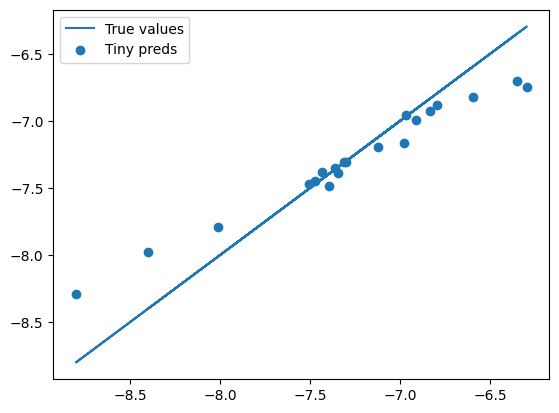

In [73]:
preds_tiny = model2.predict(dataset)
plt.plot(dataset.y, dataset.y, label="True values")
plt.scatter(dataset.y, preds_tiny, label="Tiny preds")
plt.legend()
utils.eval(model2, dataset)

RMSE   | 1.628
R2     | -0.1
MAE    | 1.328
mean   | -7.23
std    | 0.215


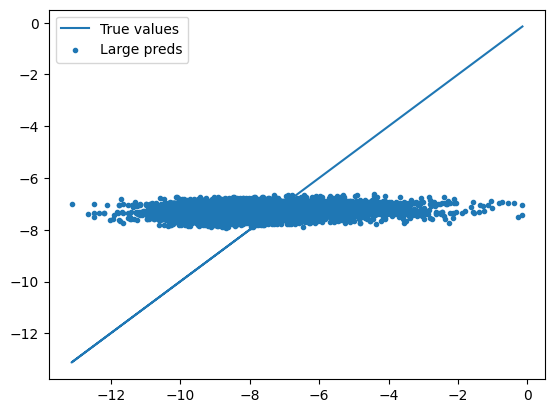

In [74]:
featurizer = dc.feat.CircularFingerprint(size=1024)

feat = featurizer
X = feat.featurize(data['molecules'])
y = data['r_i_docking_score'].to_numpy()
ids = data['SMILES']

dataset = dc.data.NumpyDataset(X=X, y=y, ids=ids)

preds_large = model2.predict(dataset)

plt.plot(dataset.y, dataset.y, label="True values")
plt.scatter(dataset.y, preds_large, marker=".", label="Large preds")
plt.legend()
utils.eval(model2, dataset)

In [75]:
errors = np.abs(dataset.y - preds_large)
data['errors'] = errors
data = data.sort_values(by="errors")
second_pool = data.head(10)
df_sample_3 = pd.concat([df_sample_2, second_pool])

# Remove selected points from data again
data = data.drop(second_pool.index)

In [76]:
df_sample_3

,i_i_glide_lignum,r_i_docking_score,SMILES,molecules,MolWt,errors
Unnamed: 0,,,,,,
4847,11832,-8.01357,O=C1CCC[C@@H](C(=O)Nc2cc(Cl)c(F)c(Cl)c2)N1,<rdkit.Chem.rdchem.Mol object at 0x00000203380...,305.136,NaN
8273,5420,-6.29522,Cc1nsc(N2CCN(C(=O)C3(NC(N)=O)CC3)CC2)n1,<rdkit.Chem.rdchem.Mol object at 0x00000203380...,310.383,NaN
3747,13565,-8.40404,O=C(NCc1cn2cc(Cl)ccc2n1)[C@H]1CC12CC[NH2+]CC2,<rdkit.Chem.rdchem.Mol object at 0x00000203380...,319.816,NaN
6437,5495,-7.36197,Cc1cncc(C(=O)N[C@H]2Cc3ccccc3[C@H]2N)c1,<rdkit.Chem.rdchem.Mol object at 0x00000203380...,267.332,NaN
6367,19952,-7.39524,COc1ccc(CN(C(=O)c2cc(S(=O)(=O)Nc3ccccc3F)c[nH]...,<rdkit.Chem.rdchem.Mol object at 0x00000203380...,443.500,NaN
8206,2993,-6.34753,Cc1c(Cl)c(C[NH+]2CCC(NC(=O)c3ccccc3)CC2)nn1C,<rdkit.Chem.rdchem.Mol object at 0x00000203380...,347.870,NaN
7545,9916,-6.79326,O=C(C[NH+]1CCN(c2ccnc(-c3nccs3)n2)CC1)Nc1ccccc1,<rdkit.Chem.rdchem.Mol object at 0x00000203380...,381.485,NaN
7838,3140,-6.59504,CC1(C)C(C(=O)NC[C@H]2CCN(S(C)(=O)=O)C2)C1(C)C,<rdkit.Chem.rdchem.Mol object at 0x00000203380...,302.440,NaN
2620,10065,-8.80331,Cn1nc(-c2ccc(F)cc2F)cc1NC(=O)N1CCCC2(CCOCC2)C1,<rdkit.Chem.rdchem.Mol object at 0x00000203380...,390.434,NaN


In [77]:
featurizer = dc.feat.CircularFingerprint(size=1024)

feat = featurizer
X = feat.featurize(df_sample_3['molecules'])
y = df_sample_3['r_i_docking_score'].to_numpy()
ids = df_sample_3['SMILES']
dataset = dc.data.NumpyDataset(X=X, y=y, ids=ids)

In [78]:
rf_model3 = RandomForestRegressor(random_state=57)
model3 = SklearnModel(model=rf_model3)
model3.fit(dataset)

RMSE   | 0.158
R2     | 0.901
MAE    | 0.097
mean   | -7.225
std    | 0.368


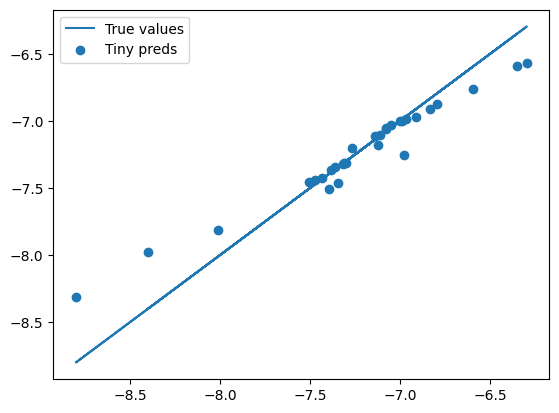

In [79]:
preds_tiny = model3.predict(dataset)
plt.plot(dataset.y, dataset.y, label="True values")
plt.scatter(dataset.y, preds_tiny, label="Tiny preds")
plt.legend()
utils.eval(model3, dataset)

RMSE   | 1.627
R2     | -0.098
MAE    | 1.329
mean   | -7.23
std    | 0.217


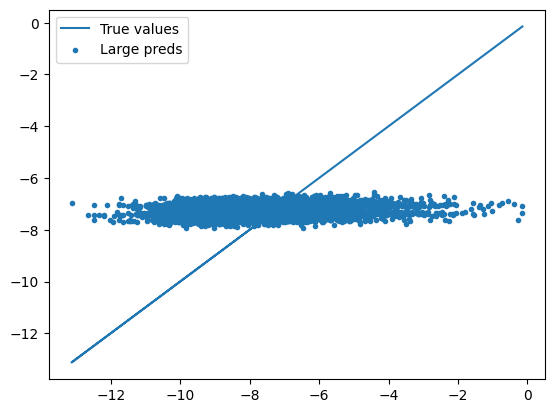

In [80]:
featurizer = dc.feat.CircularFingerprint(size=1024)

feat = featurizer
X = feat.featurize(data['molecules'])
y = data['r_i_docking_score'].to_numpy()
ids = data['SMILES']

dataset = dc.data.NumpyDataset(X=X, y=y, ids=ids)

preds_large = model3.predict(dataset)

plt.plot(dataset.y, dataset.y, label="True values")
plt.scatter(dataset.y, preds_large, marker=".", label="Large preds")
plt.legend()
utils.eval(model3, dataset)

## Third time

In [81]:
errors = np.abs(dataset.y - preds_large)
data['errors'] = errors
data = data.sort_values(by="errors")
third_pool = data.head(10)
df_sample_4 = pd.concat([df_sample_3, third_pool])

# Remove selected points from data again
data = data.drop(third_pool.index)

In [82]:
featurizer = dc.feat.CircularFingerprint(size=1024)

feat = featurizer
X = feat.featurize(df_sample_4['molecules'])
y = df_sample_4['r_i_docking_score'].to_numpy()
ids = df_sample_4['SMILES']
dataset = dc.data.NumpyDataset(X=X, y=y, ids=ids)

In [83]:
rf_model4 = RandomForestRegressor(random_state=57)
model4 = SklearnModel(model=rf_model4)
model4.fit(dataset)

RMSE   | 0.143
R2     | 0.897
MAE    | 0.078
mean   | -7.191
std    | 0.321


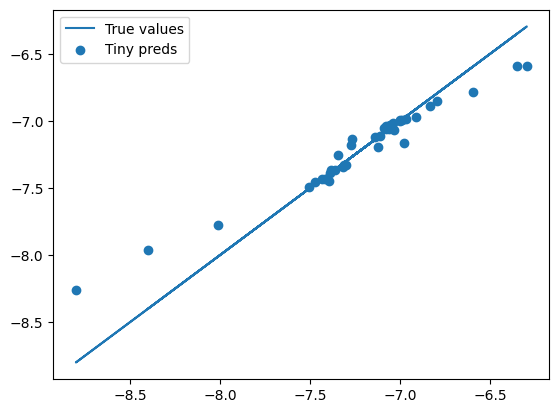

In [84]:
preds_tiny = model4.predict(dataset)
plt.plot(dataset.y, dataset.y, label="True values")
plt.scatter(dataset.y, preds_tiny, label="Tiny preds")
plt.legend()
utils.eval(model4, dataset)

RMSE   | 1.637
R2     | -0.11
MAE    | 1.339
mean   | -7.215
std    | 0.203


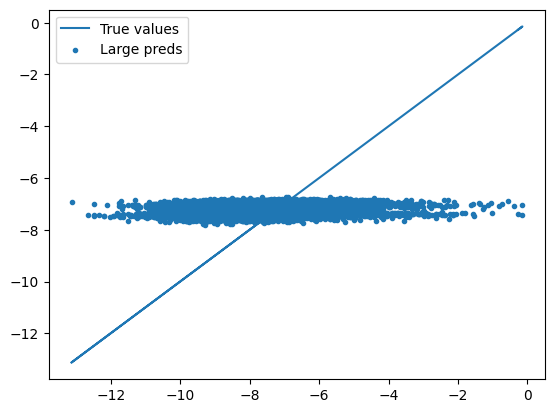

In [85]:
featurizer = dc.feat.CircularFingerprint(size=1024)

feat = featurizer
X = feat.featurize(data['molecules'])
y = data['r_i_docking_score'].to_numpy()
ids = data['SMILES']

dataset = dc.data.NumpyDataset(X=X, y=y, ids=ids)

preds_large = model4.predict(dataset)

plt.plot(dataset.y, dataset.y, label="True values")
plt.scatter(dataset.y, preds_large, marker=".", label="Large preds")
plt.legend()
utils.eval(model4, dataset)